In [1]:
#percentage of stadium filled 
#By team, weekday, weather (possibly look to bucket weather- rainy, cold, hot, etc.)
#week/ point in the season
#cityPopulation and attendance. Determining which is more influential
#prevYearwins

#interaction variables and how to evaluate them 

#Store residuals and use as the response variable. See which variables contribute most to this error


# Questions
#Categorical - how to convert (one hot, mean, etc.) and how important these choices are
 # One hot encoding (30 variables, 29 0's and 1 1)
#Numeric - Normalization, etc.
#Interaction effects
    #Multiply variables by each other 
    #Sunny (0/1) and weekend (0/1). will be 1 if both




In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('glogs_final.csv')
data = pd.DataFrame(data)

In [3]:
data['propFilled'] = data['attendance'] / data['capacity'] #added to be a possible response variable

In [4]:
data['weekend'] = np.where(data['day_of_week'].isin(['Fri','Sat','Sun']),1,0) #initial EDA shows small differences M-Thur and F-Sun
mean_attendance = data.groupby('weekend')['attendance'].mean()
mean_attendance

weekend
0    28229.696646
1    33852.574532
Name: attendance, dtype: float64

In [5]:
data = pd.get_dummies(data, columns=['h_name','v_name'], dtype=int) #One hot encoding for home and visitor teams

In [6]:
data = data[~data['year'].isin([2014, 2015, 2016])] #excludes data from 2014-2016 as this will be used at the very end

In [7]:
model_dat = data.drop(columns = ['date','year','day_of_week', 'park_id','propFilled'])

In [8]:
#there are 3640 rows in model_dat without temperature or precipitation data
model_dat_final = model_dat.dropna()

In [9]:
#Implementing MLR Model
from sklearn.model_selection import train_test_split
X = model_dat_final.drop(columns=['attendance'])  
y = model_dat_final['attendance'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [10]:
model_dat.columns

Index(['week', 'day_night', 'temp', 'precip', 'capacity', 'prev_year_wins',
       'made_playoffs', 'won_division', 'InstagramFollowers', 'CityPopulation',
       'attendance', 'weekend', 'h_name_ARI', 'h_name_ATL', 'h_name_BAL',
       'h_name_BOS', 'h_name_CHC', 'h_name_CHW', 'h_name_CIN', 'h_name_CLE',
       'h_name_COL', 'h_name_DET', 'h_name_HOU', 'h_name_KC', 'h_name_LAA',
       'h_name_LAD', 'h_name_MIA', 'h_name_MIL', 'h_name_MIN', 'h_name_NYM',
       'h_name_NYY', 'h_name_OAK', 'h_name_PHI', 'h_name_PIT', 'h_name_SD',
       'h_name_SEA', 'h_name_SF', 'h_name_STL', 'h_name_TB', 'h_name_TEX',
       'h_name_TOR', 'h_name_WSH', 'v_name_ARI', 'v_name_ATL', 'v_name_BAL',
       'v_name_BOS', 'v_name_CHC', 'v_name_CHW', 'v_name_CIN', 'v_name_CLE',
       'v_name_COL', 'v_name_DET', 'v_name_HOU', 'v_name_KC', 'v_name_LAA',
       'v_name_LAD', 'v_name_MIA', 'v_name_MIL', 'v_name_MIN', 'v_name_NYM',
       'v_name_NYY', 'v_name_OAK', 'v_name_PHI', 'v_name_PIT', 'v_name_SD',
      

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

attendance_predictions = model.predict(X_test)

In [26]:
result = pd.DataFrame({'Predicted': attendance_predictions, 'Actual': y_test})
result['Residual'] = abs(result['Predicted'] - result['Actual'])

In [27]:
result['Residual'].describe()

count     3628.000000
mean      4932.314440
std       3765.452887
min          0.713442
25%       1933.872517
50%       4157.021762
75%       7090.338499
max      24776.097549
Name: Residual, dtype: float64

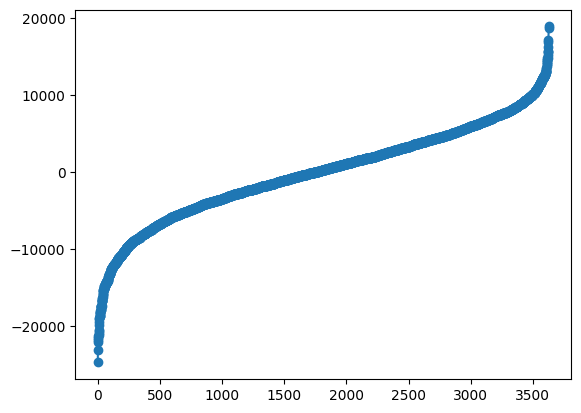

In [ ]:
import matplotlib.pyplot as plt

sorted_residuals = result['Residual'].sort_values().reset_index(drop=True)
# Plot
plt.plot(sorted_residuals, marker='o', linestyle='-')


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score 

mse = mean_squared_error(y_test, attendance_predictions)
r2 = r2_score(y_test, attendance_predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 38502453.06
R² Score: 0.67
